<a href="https://colab.research.google.com/github/bhavika2222/mission_success/blob/main/DL5_cbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import numpy as np
import nltk
from keras.layers import Conv1D, MaxPooling1D
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r' )
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

In [ ]:
text = load_doc('/content/drive/MyDrive/review_polarity-20231019T151030Z-001/review_polarity/txt_sentoken/pos/cv000_29590.txt')

In [ ]:
text

'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this seem

In [ ]:
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub( '' , w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words( 'english' ))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [ ]:
clean_doc(text)

['films',
 'adapted',
 'comic',
 'books',
 'plenty',
 'success',
 'whether',
 'theyre',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kids',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'theres',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starters',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 'series',
 'called',
 'watchmen',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes',
 'words',
 'dont',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hells',
 'directors',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'brot

In [ ]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' ' .join(tokens)

In [ ]:
vocab = open('vocab.txt')
vocab = vocab.read().split()

In [ ]:
text = doc_to_line('/content/vocab.txt',vocab)

In [ ]:
text

'sometimes tip hat film jump bandwagon enjoy ride saw truman show audience full teenagers doubt drawn ace ventura hoping see latest take fart jokes surprised may realized picture actually something say crowd id cant tell yet really good seems comparison awful mountain crap spewed forth bowls hollywood far year time alone make call end burbanks side concerned wanted win felt tribute jim carrey achieved legitimacy last best viewed cold little possible plot unless youre media blackout however probably know basics stars burbank everyman insurance agent living beautiful wife meryl laura linney south florida island town seahaven looks like michael idea perfect american small would seem live middle class lifestyle complete working bud friendly neighbors interesting coworkers tragedy past father drowned horrible boating accident leaving dreadful fear water travel general overall life one day leaves house work light falls magically sky curious event lead discover rest world already knows prison

In [ ]:
# load all docs in a directory
def process_train(directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if not filename.startswith( 'cv9' ):
      path = directory + '/' + filename
      doc = load_doc(path)
      tokens = clean_doc(doc, vocab)
      documents.append(tokens)
  return documents

def process_test(directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if filename.startswith( 'cv9' ):
      path = directory + '/' + filename
      doc = load_doc(path)
      tokens = clean_doc(doc, vocab)
      documents.append(tokens)
  return documents

In [ ]:
# load all docs in a directory
def process_docs(directory, vocab, is_train):
  documents = list()
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip any reviews in the test set
    if is_train and filename.startswith( 'cv9' ):
      continue
    if not is_train and not filename.startswith( 'cv9' ):
      continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load the doc
    doc = load_doc(path)
    # clean doc
    tokens = clean_doc(doc)
    # add to list
    documents.append(tokens)
  return documents

In [ ]:
lines = process_docs('/content/drive/MyDrive/review_polarity-20231019T151030Z-001/review_polarity/txt_sentoken/pos',
                     vocab, False)

In [ ]:
len(lines)

100

In [ ]:
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
  # load documents
  neg = process_docs('/content/drive/MyDrive/review_polarity-20231019T151030Z-001/review_polarity/txt_sentoken/neg', vocab, is_train)
  pos = process_docs('/content/drive/MyDrive/review_polarity-20231019T151030Z-001/review_polarity/txt_sentoken/pos', vocab, is_train)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels

In [ ]:
train,train_labels = load_clean_dataset(vocab, True)
test,test_labels = load_clean_dataset(vocab, False)

In [ ]:
len(train), len(test)

(1810, 200)

Build the DNN model

In [ ]:
# define the model
def define_model(n_words):
  # define network
  model = Sequential()
  model.add(Dense(50, input_shape=(n_words,), activation= 'relu' ))
  model.add(Dense(1, activation= 'sigmoid' ))
  # compile network
  model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' ,
                metrics=[ 'accuracy' ])
  # summarize defined model
  model.summary()
  plot_model(model, to_file= 'model.png' , show_shapes=True)
  return model

In [ ]:
d=train+test

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
#create the tokenizer
tokenizer=create_tokenizer(d)

In [ ]:
#encode data
x_train=tokenizer.texts_to_matrix(d, mode='binary')

In [ ]:
x_train.shape

(2010, 46558)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [ ]:
tokenizer.word_docs

defaultdict(int,
            {'stars': 332,
             'determine': 28,
             'two': 1029,
             'picture': 392,
             'terrible': 120,
             'makes': 725,
             'costumes': 63,
             'lowbrow': 10,
             'execution': 43,
             'weak': 90,
             'prove': 100,
             'tap': 8,
             'confrontation': 39,
             'across': 194,
             'even': 1296,
             'hundreds': 37,
             'uncertainty': 8,
             'boy': 219,
             'acting': 531,
             'nearlyinconsequential': 1,
             'didnt': 430,
             'shouting': 25,
             'languages': 4,
             'uncouth': 2,
             'takes': 537,
             'makers': 49,
             'lewis': 33,
             'real': 593,
             'leslie': 17,
             'manic': 25,
             'intrepid': 5,
             'frenchman': 8,
             'poor': 176,
             'explorers': 3,
             'necessary': 

In [ ]:
# define network
n_words = x_train.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2327950   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2328001 (8.88 MB)
Trainable params: 2328001 (8.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [ ]:
l=train_labels+test_labels

In [ ]:
# fit network
model.fit(x_train, np.array(l), epochs=10, batch_size=10)

Epoch 1/10
201/201 [==============================] - 7s 31ms/step - loss: 0.4294 - accuracy: 0.8025
Epoch 2/10
201/201 [==============================] - 7s 33ms/step - loss: 0.0296 - accuracy: 0.9970
Epoch 3/10
201/201 [==============================] - 6s 28ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 4/10
201/201 [==============================] - 7s 34ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/10
201/201 [==============================] - 6s 29ms/step - loss: 4.5452e-04 - accuracy: 1.0000
Epoch 6/10
201/201 [==============================] - 6s 32ms/step - loss: 2.6038e-04 - accuracy: 1.0000
Epoch 7/10
201/201 [==============================] - 7s 34ms/step - loss: 1.6742e-04 - accuracy: 1.0000
Epoch 8/10
201/201 [==============================] - 6s 30ms/step - loss: 1.1333e-04 - accuracy: 1.0000
Epoch 9/10
201/201 [==============================] - 7s 37ms/step - loss: 8.0656e-05 - accuracy: 1.0000
Epoch 10/10
201/201 [==============================] - 6s 30ms/step - l

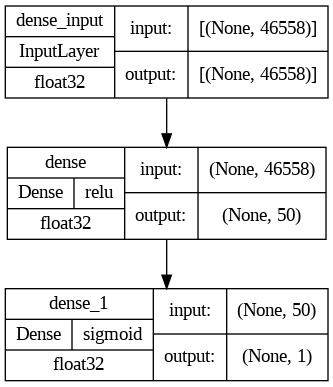

In [ ]:
plot_model(model, show_dtype=True, show_layer_activations=True,
           show_shapes=True, show_layer_names=True )

In [ ]:
# classify a review as negative or positive
def predict_sentiment(review):
  # clean
  tokens = clean_doc(review)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  # convert to line
  line = ' ' .join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode= 'binary' )
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrieve predicted percentage and label
  percent_pos = yhat[0,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'

In [ ]:
# test positive text
text = ' Best movie ever! It was great, I will definitely recommend it. '
percent, sentiment = predict_sentiment(text)
print( ' Review: [%s]\nSentiment: %s (%.3f%%) ' % (text, sentiment, percent*100))

 Review: [ Best movie ever! It was great, I will definitely recommend it. ]
Sentiment: POSITIVE (60.273%) 


In [ ]:
# test negative text
text = ' This is a bad movie. '
percent, sentiment = predict_sentiment(text)
print( ' Review: [%s]\nSentiment: %s (%.3f%%) ' % (text, sentiment, percent*100))

 Review: [ This is a bad movie. ]
Sentiment: NEGATIVE (67.449%) 
